# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 7


### Zadanie 1

Z miasta A do miasta B kierowca przejechał ze średnią szybkością 60 km/h. Z powrotem jechał szybciej, ze średnią 80 km/h. Jaka była jego średnia szybkość na całej trasie? 

**Uwaga:** nie używaj gotowych implementacji.

> Wskazówka: średnia harmoniczna.

In [3]:
v1 = 60
v2 = 80
vav = 2/(1/v1+1/v2)
print(f'Jechal ze srednia predkoscia {vav:.2f} km/h')

Jechal ze srednia predkoscia 68.57 km/h


### Zadanie 2

Wyobraźmy sobie miasto o liczbie 700 tys. mieszkańców. W mieście pojawiła się choroba i wiemy, że jedna osoba na 1000 zachorowała. Nie wiemy, które to dokładnie osoby, ale jest dostępny test, którego skuteczność wynosi 99%. Teraz wcielamy się w pacjenta, który przeprowadził test, a wynik testu jest pozytywny. Chcemy dowiedzieć się, jakie jest prawdopodobieństwo, że zachorowaliśmy.

#### A)

Przeprowadzić symulację komputerową:

- Utwórz listę mieszkańców o wielkości 700 tys. elementów, gdzie każdy element reprezentuje mieszkańca. Każdy element powinien posiadać dwie właściwości: *stan zdrowia* oraz *wynik diagnozy*.
- Losowo wybieramy 700 tys./1000 (bo jedna na 1000 osob zachorowała) osób i zaznaczamy ich *stan zdrowia* jako *chory*. Uwaga: należy dopilnować, aby nie wylosowała się dwukrotnie ta sama osoba.
- Wybieramy losowo po 1% osob chorych i zdrowych, a następnie zaznaczamy ich *wynik diagnozy* na nieprawidłowy, czyli przeciwny do *stanu zdrowia* (bo skutecznosc testu wynosi 99%).
- Oblicz jakie jest prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora (`liczba osób chorych z wynikiem pozytywnym` / `liczba wszystkich osob z wynikiem pozytywnym`).

In [36]:
import random
import time

start = time.time()
population = 700000
people = [[0, 0] for _ in range(population)]

sick_indexes = set()
while len(sick_indexes) < 700:
    sick_indexes.add(random.randint(0, population - 1))
sick_indexes = list(sick_indexes)

for person_index in sick_indexes:
    people[person_index][0] = 1
    people[person_index][1] = 1

healthy_indexes = [i for i, person in enumerate(people) if person[0] == 0]


false_healthy = set()
while len(false_healthy) < len(sick_indexes)/100:
    false_healthy.add(random.choice(sick_indexes))

false_sick = set()
while len(false_sick) < (population-len(sick_indexes))/100:
    false_sick.add(random.choice(healthy_indexes))

for index in false_healthy:
    people[index][1] = 0

for index in false_sick:
    people[index][1] = 1

true_healthy = 0
healthy = 0

for person in people:
    if person[0] == 1 and person[1] == 1:
        true_healthy += 1
    if person[1] == 1:
        healthy += 1
end = time.time()
# print(true_healthy)
# print(healthy)

print(f'Prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora: {(true_healthy/healthy):.8f}\nCzas wykonania: {end-start}s')

Prawdopodobienstwo ze osoba z pozytywnym wynikiem testu jest faktycznie chora: 0.09016393
Czas wykonania: 0.3291809558868408s


#### B)

Napisać funkcję, która zwróci wynik obliczony ze wzoru Bayesa. Zmierz i porównaj czas obliczeń w zad. A i zad. B



In [41]:
def bayes_prob(test_accuracy):
    return (test_accuracy*(1/1000))/(0.999*(1-test_accuracy)+0.001*test_accuracy)

start = time.time()
ans = bayes_prob(0.99)
end = time.time()
print(f'Wynik ze wzoru Bayesa: {ans}\nCzas wykonania: {end-start}s')

Wynik ze wzoru Bayesa: 0.09016393442622944
Czas wykonania: 0.0s


#### C)

Wyświetl wykres, gdzie na osi X znajduje się skuteczność testu (przyjmij zakres 50%-99.99%), a na osi Y znajduje się _prawdopodobieństwo, że osoba z pozytywnym wynikiem jest chora_ (użyj funkcji z podpunktu B).

Text(0, 0.5, 'Bayes Prob')

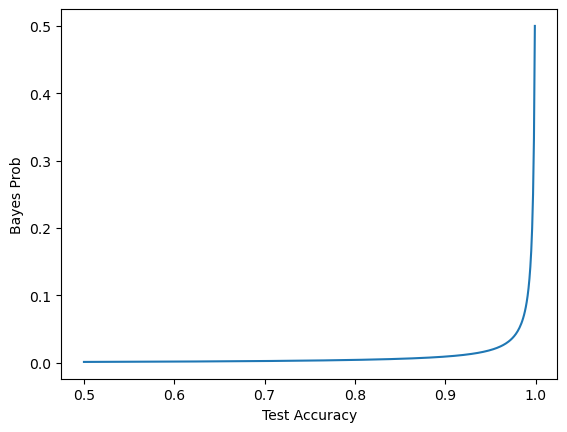

In [47]:
import matplotlib.pyplot as plt


accuracy = []
prob = []
for i in range(0, 500):
    prob.append(bayes_prob(0.5+i/1000))
    accuracy.append(0.5+i/1000)
    
plt.plot(accuracy, prob)
plt.xlabel('Test Accuracy')
plt.ylabel('Bayes Prob')

### Zadanie 3

Sprawdź (symulacją) ile średnio razy należy losować 13 kart, aby trafia się "ręka" zawierająca $\ge 8$ kart w jednym kolorze.

* Czyli losujemy 13 kart z 52 (wiec "ręki" jak w brydzu) tak długo, aż w którymkolwiek kolorze dostaniemy $\ge 8$ kart, zapisujemy liczbę przeprowadzonych losowań i podejmujemy kolejną próbę.
* Przeprowadź 1000 takich prób i oblicz średnią liczbę losowań. 
* Dodatkowo wypisz jedną (np. ostatnią) wylosowaną "rękę".

In [59]:
def reka_():
    karty = list(range(1, 53))
    random.shuffle(karty)
    reka = {"kier": 0, "karo": 0, "trefl": 0, "pik": 0}
    for karta in karty[:13]:
        kolor = ""
        if karta <= 13:
            kolor = "kier"
        elif karta <= 26:
            kolor = "karo"
        elif karta <= 39:
            kolor = "trefl"
        else:
            kolor = "pik"
        reka[kolor] += 1
    return reka

def losowania():
    liczba_losowan = 0
    while True:
        liczba_losowan += 1
        reka = reka_()
        if max(reka.values()) >= 8:
            return liczba_losowan, reka

liczba_prob = 1000
suma_losowan = 0

for _ in range(liczba_prob):
    liczba_losowan, ostatnia_reka = losowania()
    suma_losowan += liczba_losowan

srednia_liczba_losowan = suma_losowan / liczba_prob

print(f'Średnia liczba losowań: {srednia_liczba_losowan}')
print(f'Ostatnia wylosowana reka: {ostatnia_reka}')


Średnia liczba losowań: 190.467
Ostatnia wylosowana reka: {'kier': 2, 'karo': 2, 'trefl': 8, 'pik': 1}
